<a href="https://colab.research.google.com/github/psbruno/Redes-Neurais/blob/main/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> Bruno Pires - RA 139892 </h1>
<h3> Projeto 1 - Rede MLP </h3>

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

#Função de para plot

*   Fonte: [Documentação do learning_curve](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html)



In [3]:
def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
    if axes is None:
        _, axes = plt.subplots(1, 2, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    print("\n")
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")    
    return plt

#Classificação


Dataset: Dados de carros usados do reino unido, sendo usado apenas os carros da hyundai.
Dados preço, ano, milhas andas e milhas por galão, tentamos adivinhar o modelo do carro.
Fonte: [Kaggle](https://www.kaggle.com/adityadesai13/used-car-dataset-ford-and-mercedes?select=hyundi.csv) 



Divisão de treino e teste

In [4]:
cars = pd.read_csv("hyundi.csv")
input = cars[['year','price','mileage','mpg']]
scale = StandardScaler()
scale.fit(input)
norm_X = scale.transform(input)
cars_xtrain, cars_xtest,cars_ytrain,cars_ytest = train_test_split(norm_X,cars['model'],test_size=0.2)

Note que apenas com um neuronio em uma camada oculta já temos um resultado não muito interessante, pois o nosso problema é linear, ou seja, não seriam necessárias várias curvas para a classificação. 

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


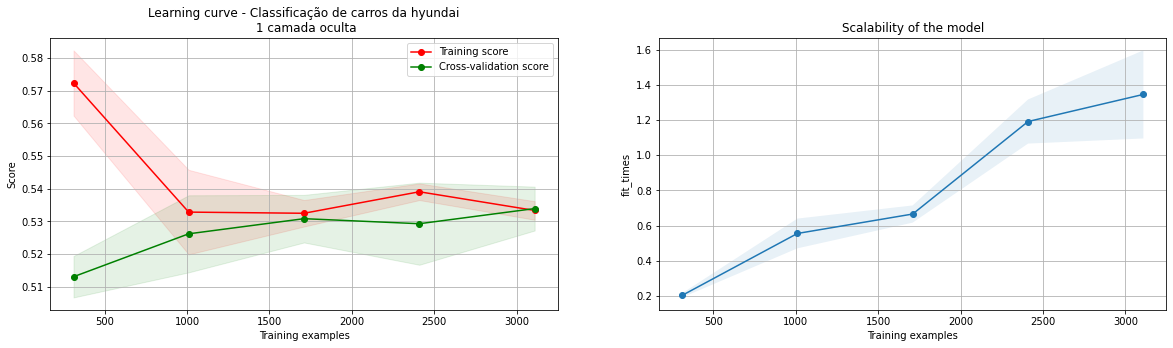

Score:  0.5606995884773662


In [5]:
cars_rna = MLPClassifier(hidden_layer_sizes=(1),
                    max_iter=2000,
                    tol= 0.001,
                    learning_rate_init = 0.1,
                    solver = "sgd",
                    activation = 'logistic',
                    validation_fraction=0.2
                    )
cars_rna.fit(cars_xtrain,cars_ytrain)

title = "Learning curve - Classificação de carros da hyundai\n 1 camada oculta"
plot_learning_curve(
    cars_rna, title, cars_xtrain, cars_ytrain
)

plt.show()
print("Score: ", cars_rna.score(cars_xtest,cars_ytest))

Entretanto, podemos aprimorar os nossos resultados ainda mais de acordo com a topologia da rede:

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


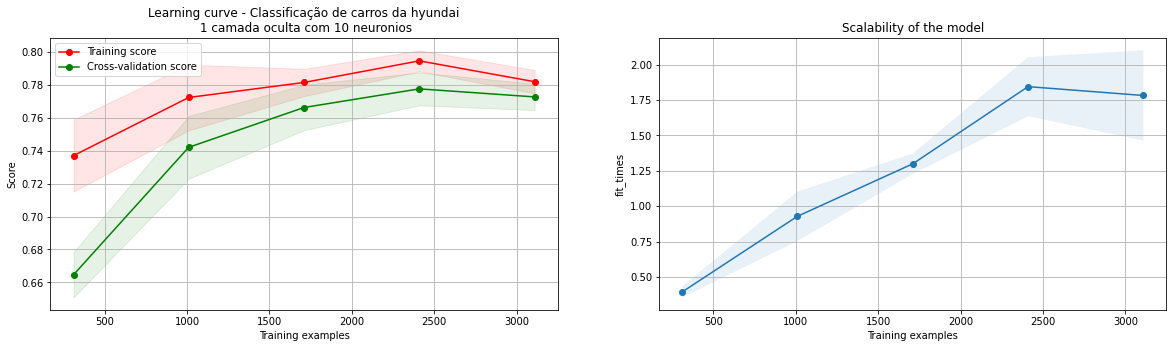

Score:  0.7788065843621399


In [6]:
cars_rna = MLPClassifier(hidden_layer_sizes=(10),
                    max_iter=2000,
                    tol= 0.001,
                    learning_rate_init = 0.1,
                    solver = "sgd",
                    activation = 'logistic',
                    validation_fraction=0.2
                    )
cars_rna.fit(cars_xtrain,cars_ytrain)

title = "Learning curve - Classificação de carros da hyundai\n 1 camada oculta com 10 neuronios"
plot_learning_curve(
    cars_rna, title, cars_xtrain, cars_ytrain
)

plt.show()
print("Score: ", cars_rna.score(cars_xtest,cars_ytest))

Note que adicionando novos neuronios nessa primeira camada temos resultados melhores, graficamente e pela métrica de avaliação. 



Logo aumentando o número de camadas e fazendo outras alterações na topologia:

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


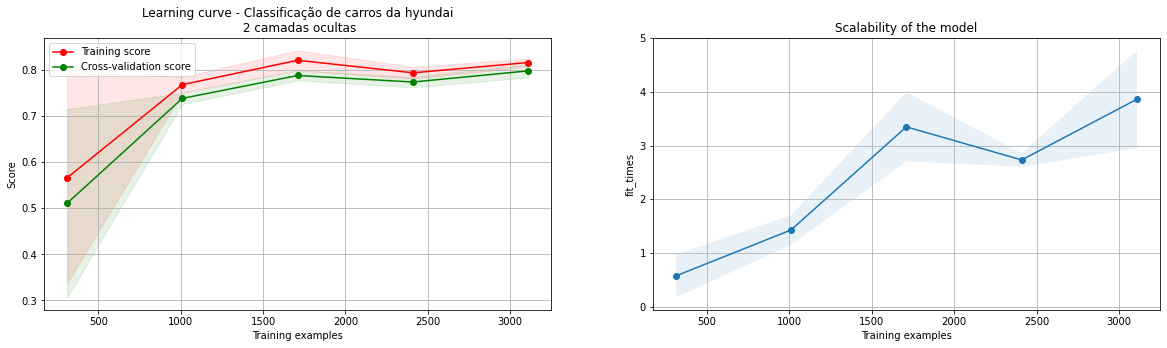

Score:  0.8117283950617284


In [8]:
cars_rna = MLPClassifier(hidden_layer_sizes=(20,5),
                    max_iter=2000,
                    tol= 0.001,
                    learning_rate_init = 0.1,
                    solver = "sgd",
                    activation = 'logistic',
                    validation_fraction=0.2
                    )
cars_rna.fit(cars_xtrain,cars_ytrain)

title = "Learning curve - Classificação de carros da hyundai\n 2 camadas ocultas"
plot_learning_curve(
    cars_rna, title, cars_xtrain, cars_ytrain
)

plt.show()
print("Score: ", cars_rna.score(cars_xtest,cars_ytest))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


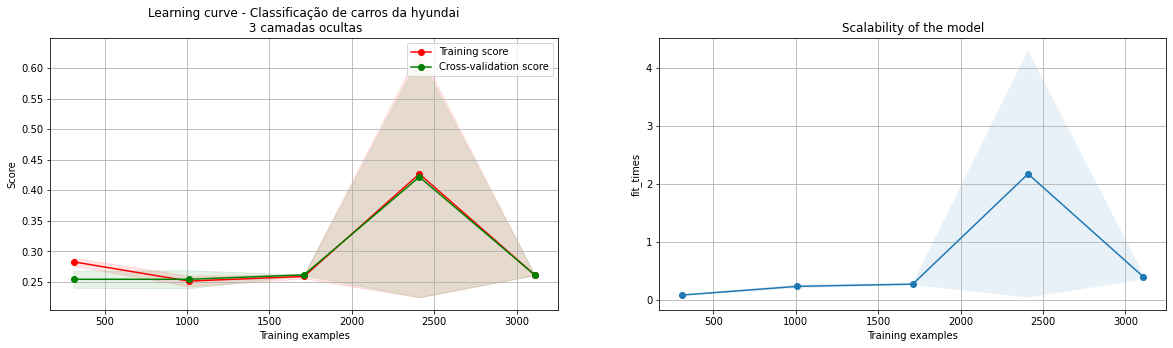

Score:  0.7746913580246914


In [28]:
cars_rna = MLPClassifier(hidden_layer_sizes=(40,9,2),
                    max_iter=2000,
                    tol= 0.001,
                    learning_rate_init = 0.1,
                    solver = "sgd",
                    activation = 'logistic',
                    validation_fraction=0.2
                    )
cars_rna.fit(cars_xtrain,cars_ytrain)

title = "Learning curve - Classificação de carros da hyundai\n 3 camadas ocultas"
plot_learning_curve(
    cars_rna, title, cars_xtrain, cars_ytrain
)

plt.show()
print("Score: ", cars_rna.score(cars_xtest,cars_ytest))

Ajustando outros parâmetros na rede de duas camadas para tentar achar o fit ideal, além de fazer o uso momentum e regularização

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


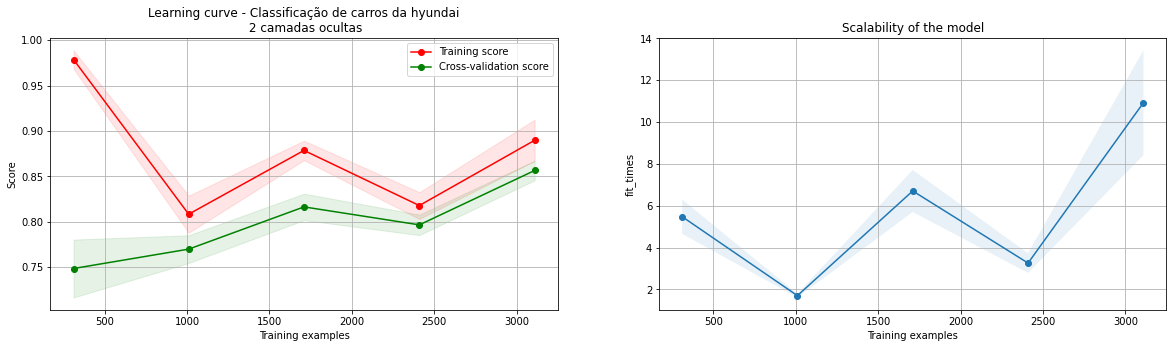

Score:  0.8786008230452675


In [33]:
cars_rna = MLPClassifier(hidden_layer_sizes=(31,14),
                    max_iter=4000,
                    tol= 0.000075,
                    learning_rate_init = 0.1,
                    solver = "sgd",
                    activation = 'logistic',
                    validation_fraction=0.2
                    )
cars_rna.fit(cars_xtrain,cars_ytrain)

title = "Learning curve - Classificação de carros da hyundai\n 2 camadas ocultas"
plot_learning_curve(
    cars_rna, title, cars_xtrain, cars_ytrain
)

plt.show()
print("Score: ", cars_rna.score(cars_xtest,cars_ytest))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


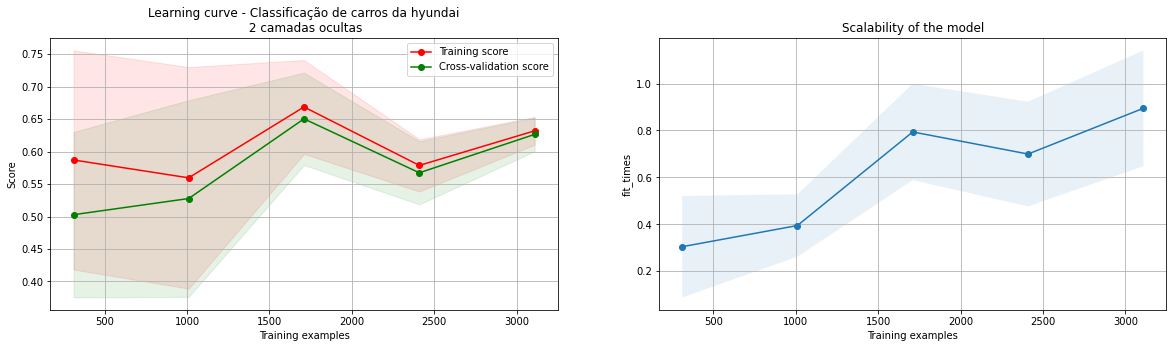

Score:  0.6532921810699589


In [35]:
cars_rna = MLPClassifier(hidden_layer_sizes=(31,14),
                    max_iter=4000,
                    tol= 0.000075,
                    learning_rate_init = 0.1,
                    solver = "sgd",
                    activation = 'logistic',
                    validation_fraction=0.2,
                    momentum = 1
                    )
cars_rna.fit(cars_xtrain,cars_ytrain)

title = "Learning curve - Classificação de carros da hyundai\n 2 camadas ocultas"
plot_learning_curve(
    cars_rna, title, cars_xtrain, cars_ytrain
)

plt.show()
print("Score: ", cars_rna.score(cars_xtest,cars_ytest))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


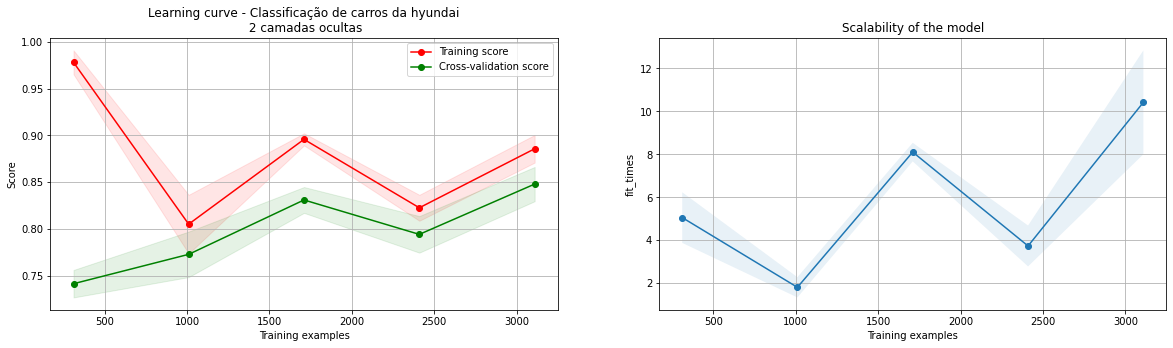

Score:  0.8837448559670782


In [36]:
cars_rna = MLPClassifier(hidden_layer_sizes=(31,14),
                    max_iter=4000,
                    tol= 0.000075,
                    learning_rate_init = 0.1,
                    solver = "sgd",
                    activation = 'logistic',
                    validation_fraction=0.2,
                    alpha = 0.001
                    )
cars_rna.fit(cars_xtrain,cars_ytrain)

title = "Learning curve - Classificação de carros da hyundai\n 2 camadas ocultas"
plot_learning_curve(
    cars_rna, title, cars_xtrain, cars_ytrain
)

plt.show()
print("Score: ", cars_rna.score(cars_xtest,cars_ytest))

#Regressão
Fonte: [Kaggle](https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009)

Dados alguns atributos do dataset com informações sobre vinhos, é objetivado a predição do seu teor alcoólico.


Adotando os mesmos métodos para esse dataset, mas com a abordagem de um problema de regressão, temos:

In [4]:
wines = pd.read_csv("/content/winequality-red.csv")
wines_columns = wines[['volatile acidity', 'citric acid',
       'chlorides', 'total sulfur dioxide', 'density',
       'pH', 'sulphates']]

title = "Learning Curves - Predição do teor alcoólico do vinho"
scale = StandardScaler()
scale.fit(wines_columns)
norm_x_wine = scale.transform(wines_columns)
wine_xtrain, wine_xtest,wine_ytrain,wine_ytest = train_test_split(norm_x_wine,wines['alcohol'],test_size=0.2)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


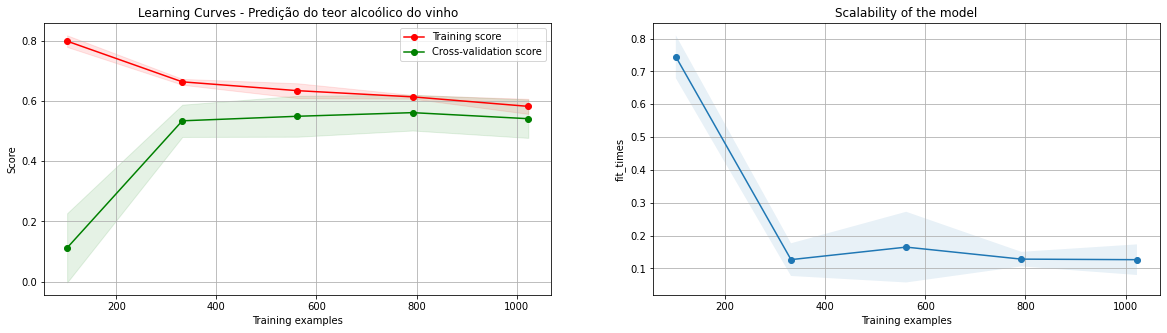

0.5931209491398709

In [7]:
wine_rna = MLPRegressor(hidden_layer_sizes=(10),
                    max_iter=2000,
                    tol= 0.00001,
                    learning_rate_init = 0.1,
                    solver = "sgd",
                   activation = 'logistic',
                   validation_fraction=0.2
                    )

wine_rna.fit(wine_xtrain,wine_ytrain)
plot_learning_curve(
    wine_rna, title, wine_xtrain, wine_ytrain
)

plt.show()
y_wine_predict = wine_rna.predict(wine_xtest) 
r2_score(wine_ytest, y_wine_predict)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (750) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (750) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (750) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (750) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

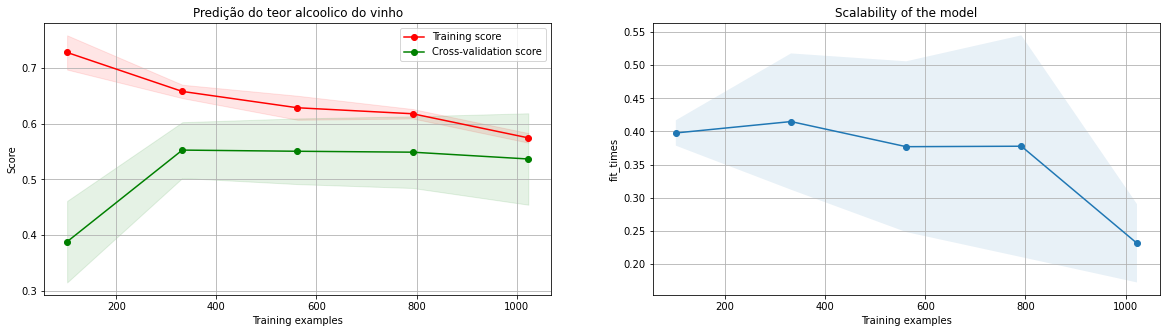

0.6190319756295202

In [8]:
wine_rna = MLPRegressor(hidden_layer_sizes=(40),
                    max_iter=750,
                    tol= 0.000001,
                    learning_rate_init = 0.1,
                    solver = "sgd",
                   activation = 'logistic',
                   validation_fraction=0.2
                    )

wine_rna.fit(wine_xtrain,wine_ytrain)

title = "Predição do teor alcoolico do vinho"
plot_learning_curve(
    wine_rna, title, wine_xtrain, wine_ytrain
)

plt.show()
y_wine_predict = wine_rna.predict(wine_xtest) 
r2_score(wine_ytest, y_wine_predict)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


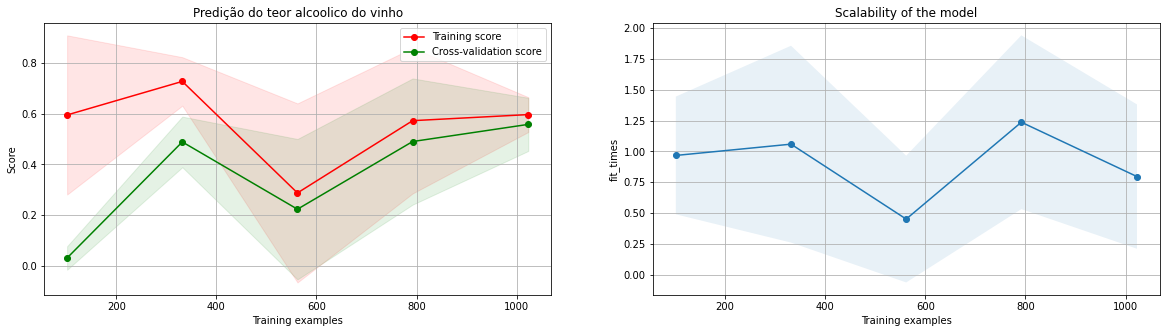

0.6536788193187233

In [10]:
wine_rna = MLPRegressor(hidden_layer_sizes=(35,12),
                    max_iter=2000,
                    tol= 0.00001,
                    learning_rate_init = 0.1,
                    solver = "sgd",
                   activation = 'logistic',
                   validation_fraction=0.2
                    )

wine_rna.fit(wine_xtrain,wine_ytrain)
title = "Predição do teor alcoolico do vinho"

plot_learning_curve(
    wine_rna, title, wine_xtrain, wine_ytrain
)

plt.show()
y_wine_predict = wine_rna.predict(wine_xtest) 
r2_score(wine_ytest, y_wine_predict)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


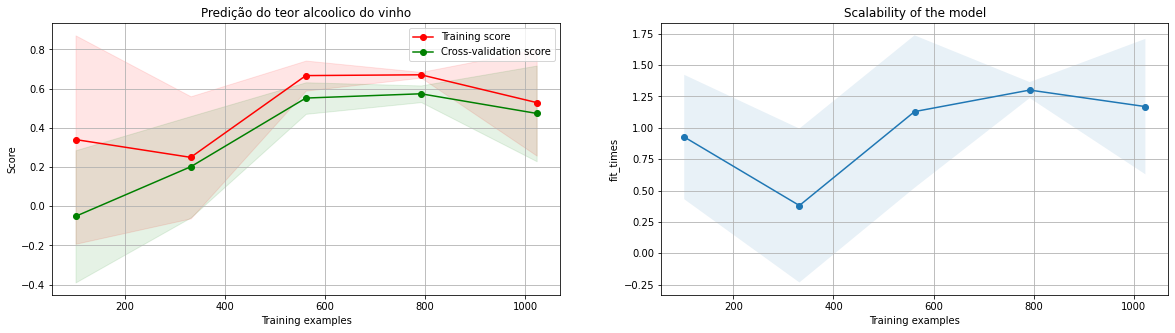

0.6422397542053013

In [12]:
wine_rna = MLPRegressor(hidden_layer_sizes=(30,14,8),
                    max_iter=2000,
                    tol= 0.00001,
                    learning_rate_init = 0.1,
                    solver = "sgd",
                   activation = 'logistic',
                   validation_fraction=0.2
                    )

wine_rna.fit(wine_xtrain,wine_ytrain)
title = "Predição do teor alcoolico do vinho"

plot_learning_curve(
    wine_rna, title, wine_xtrain, wine_ytrain
)

plt.show()
y_wine_predict = wine_rna.predict(wine_xtest) 
r2_score(wine_ytest, y_wine_predict)


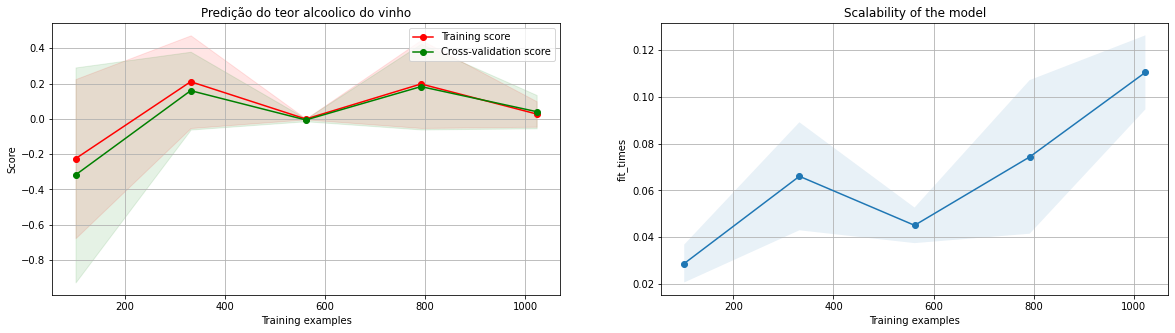

0.6422397542053013

In [13]:
wine_rna = MLPRegressor(hidden_layer_sizes=(35,12),
                    max_iter=2000,
                    tol= 0.00001,
                    learning_rate_init = 0.1,
                    solver = "sgd",
                   activation = 'logistic',
                   validation_fraction=0.2,
                   momentum = 1
                    )

wine_rna.fit(wine_xtrain,wine_ytrain)
title = "Predição do teor alcoolico do vinho"

plot_learning_curve(
    wine_rna, title, wine_xtrain, wine_ytrain
)

plt.show()
y_wine_predict = wine_rna.predict(wine_xtest) 
r2_score(wine_ytest, y_wine_predict)



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


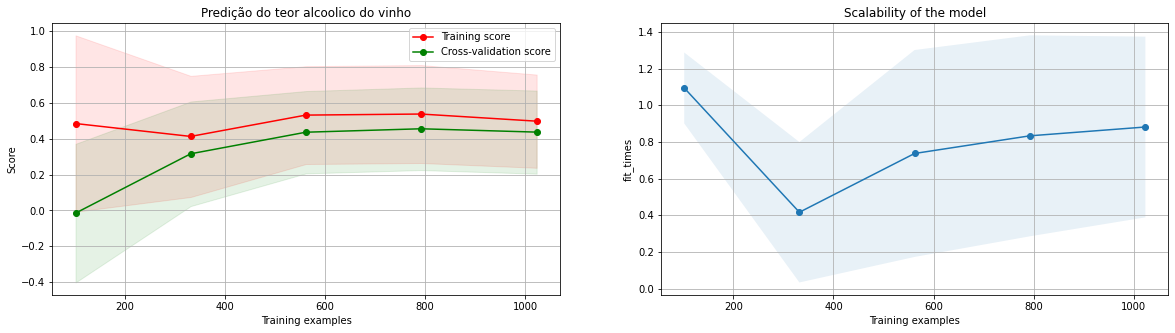

0.6262014856918148

In [15]:
wine_rna = MLPRegressor(hidden_layer_sizes=(35,12),
                    max_iter=2000,
                    tol= 0.00001,
                    learning_rate_init = 0.1,
                    solver = "sgd",
                   activation = 'logistic',
                   validation_fraction=0.2,
                   alpha = 0.001
                    )

wine_rna.fit(wine_xtrain,wine_ytrain)
title = "Predição do teor alcoolico do vinho"

plot_learning_curve(
    wine_rna, title, wine_xtrain, wine_ytrain
)

plt.show()
y_wine_predict = wine_rna.predict(wine_xtest) 
r2_score(wine_ytest, y_wine_predict)

